In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df_rating = pd.read_csv('/content/sample_data/Books/Ratings.csv')
df_books = pd.read_csv('/content/sample_data/Books/Books.csv')
df_users = pd.read_csv('/content/sample_data/Books/Users.csv')
# df_books.head()
# df_rating.head()
df_users.head()

<ipython-input-40-5bab270a4a68>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/sample_data/Books/Books.csv')


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
df_images = df_books.iloc[:, -2:]
df_books = df_books.iloc[:, :-2]
# df_images.head()
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
userCounts = df_rating['User-ID'].value_counts()
isbnCounts = df_rating['ISBN'].value_counts()
print(isbnCounts)

0971880107    1628
0316666343     859
0385504209     598
0312195516     483
0060928336     479
              ... 
0752600667       1
0752600904       1
0752839780       1
0752839802       1
34               1
Name: ISBN, Length: 262745, dtype: int64


In [ ]:
df_rating['User-ID'].unique()

array([276725, 276726, 276727, ..., 276709, 276721, 276723])

In [ ]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    1
dtype: int64

In [ ]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    1
dtype: int64

In [ ]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
dfr = df_rating
dfr = dfr[~dfr['ISBN'].isin(isbnCounts[isbnCounts < 100].index)]

dfr = pd.merge(right=dfr, left = df_books, on="ISBN")
dfr.head()
dfr = dfr[~dfr['User-ID'].isin(userCounts[userCounts < 200].index)]
dfr = dfr.drop_duplicates(["Book-Title", "User-ID"])

In [ ]:
combine_book_rating = dfr
columns = ['Year-Of-Publication', 'Book-Author', 'Image-URL-S', 'Publisher']
combine_book_rating =  combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
5,0440234743,The Testament,2977,0
7,0440234743,The Testament,3363,0
10,0440234743,The Testament,7346,9
14,0440234743,The Testament,9856,0


In [ ]:
# group by book titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis=0, subset = ['Book-Title'])
book_ratingCount = (combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,1984,52
1,1st to Die: A Novel,153
2,2nd Chance,114
3,4 Blondes,72
4,A Beautiful Mind: The Life of Mathematical Gen...,46


In [89]:
print(combine_book_rating.columns)
print(book_ratingCount.columns)

Index(['ISBN', 'Book-Title', 'User-ID', 'Book-Rating'], dtype='object')
Index(['Book-Title', 'totalRatingCount'], dtype='object')


In [84]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title')
rating_with_totalRatingCount.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
0,0440234743,The Testament,277478,0,150
1,0440234743,The Testament,2977,0,150
2,0440234743,The Testament,3363,0,150
3,0440234743,The Testament,7346,9,150
4,0440234743,The Testament,9856,0,150


In [95]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    123.60
0.91    128.00
0.92    134.00
0.93    137.96
0.94    145.04
0.95    157.40
0.96    164.24
0.97    170.84
0.98    183.00
0.99    211.96
Name: totalRatingCount, dtype: float64


In [96]:
popularity_threshold = 211.96
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,ISBN,Book-Title,User-ID,Book-Rating,totalRatingCount
203,0971880107,Wild Animus,277427,0,365
204,0971880107,Wild Animus,277478,0,365
205,0971880107,Wild Animus,2766,6,365
206,0971880107,Wild Animus,2977,0,365
207,0971880107,Wild Animus,3363,0,365


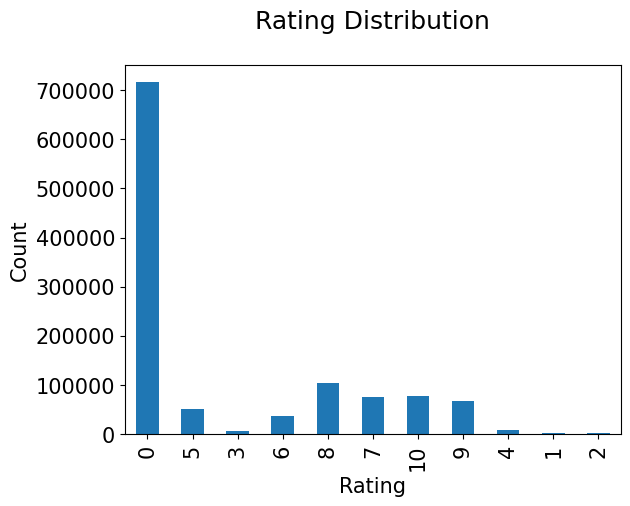

In [94]:
plt.rc('font', size=15)
df_rating['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()